## Joseph Rochelle
## DSC 550 Data Mining
## Orgional Case Study 1

In [70]:
import pandas as pd
from matplotlib import __version__ as mpv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
import numpy as np


**Link to data:** https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv

**Problem Statement:**

We live in a world where there are apps for everything. As a great idea emerges, a developer simply uploads the apps to Apple and Google stores for users to receive for free or to pay for service. Investors need predictive frameworks to predict high ratings and downloads, which can assist with determining if the app should be free, free with advertisements, or a paid service. By creating a predictive model, investors can access the mode of which the app should be uploaded to yield the strongest return on investment as the app is intended to scale. 


**Proposal of solutions:** 

By using the `google play store` data set, I will evaluate a regression models of free and paid apps as Model A. Free and Paid apps will be the dependent variable of `X` and the predictor independent variables of `Y` will be rating (1-5 score), # of reviews, # of downloads, Size of the app (which will remove ‘m’ from the data, and installs.   Model B will include the same predictor variables but will focus on the classifiers of everyone and teen. 

The goal is to determine which features are predict a high rating. Therefore, this researcher will likely transform the apps with a rating of 4 or higher as 1 and ratings lower as 0 as a third regression evaluaiton. The summary of all data mentioned should provide a direction on understanding how free/paid apps impact ratings and how the content rating influences scores.


In [71]:
df= pd.read_csv("googleplaystore.csv")
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Exploratory Data Analysis

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [73]:
df.shape

(10841, 13)

In [74]:
df.describe

<bound method NDFrame.describe of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTY

In [75]:
# Based off the data frame, there is not a lot of value out of the verison of the phone's software so dropped. 
df.drop('Current Ver', axis = 1, inplace = True)
df.drop('Android Ver', axis = 1, inplace = True)

In [76]:
df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018"


In [77]:
## The next observation is that size has words and sizing of M. We will evaluate the reviews and size 
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [78]:
#We notice in the data cleaning that 'varies with device' needs to go. 
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [79]:
df.drop(10472,inplace=True)

In [80]:
#it is clear in the installs column that we have groupings.
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [81]:
## Now conversting these columns from text to numbers and making the sizing consistent unit of measure. 
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

**Please Note:** 
I ran `df['Size'].unique()` again to validate that the sizing was updated correctly. 

In [82]:
## Dropping duplicate data from the app column as these are redundant. 
df[df['App'].duplicated() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0,Everyone,Business,"February 26, 2018"
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0,Everyone,Business,"July 31, 2018"
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0,Everyone,Business,"July 24, 2018"
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0,Everyone,Business,"July 20, 2018"
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0,Everyone,Business,"July 16, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0,Mature 17+,Dating,"February 25, 2016"
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0,Everyone,Communication,"July 6, 2018"
10730,FP Notebook,MEDICAL,4.5,410,60.0,50000,Free,0,Everyone,Medical,"March 24, 2018"
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12.0,1000000,Free,0,Everyone,Shopping,"July 30, 2018"


In [83]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False
10839,False,False,False,False,True,False,False,False,False,False,False


In [84]:
df['Miss_Rating'] = df['Rating'].isnull()
df['Miss_Size'] = df['Size'].isnull()

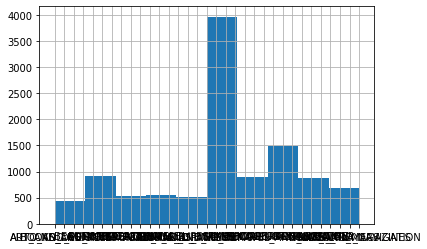

In [85]:
hist3 = df['Category'].hist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

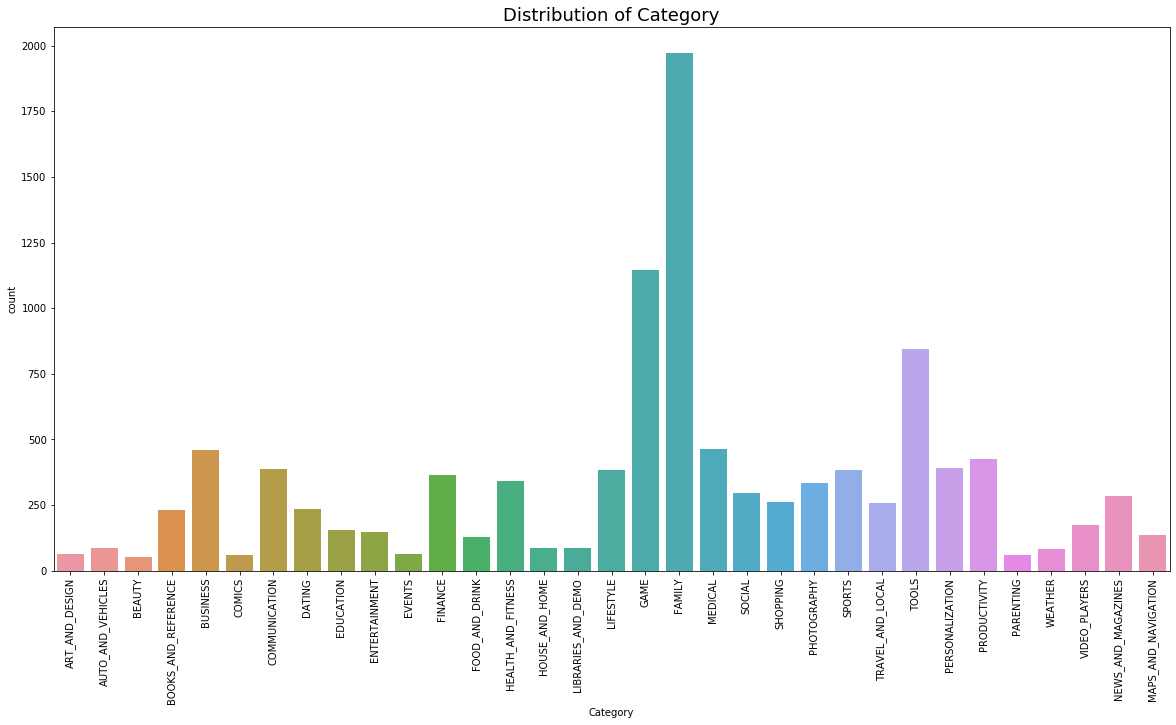

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(x='Category',data=df)
plt.title("Distribution of Category", size=18)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

<Figure size 3600x1440 with 0 Axes>

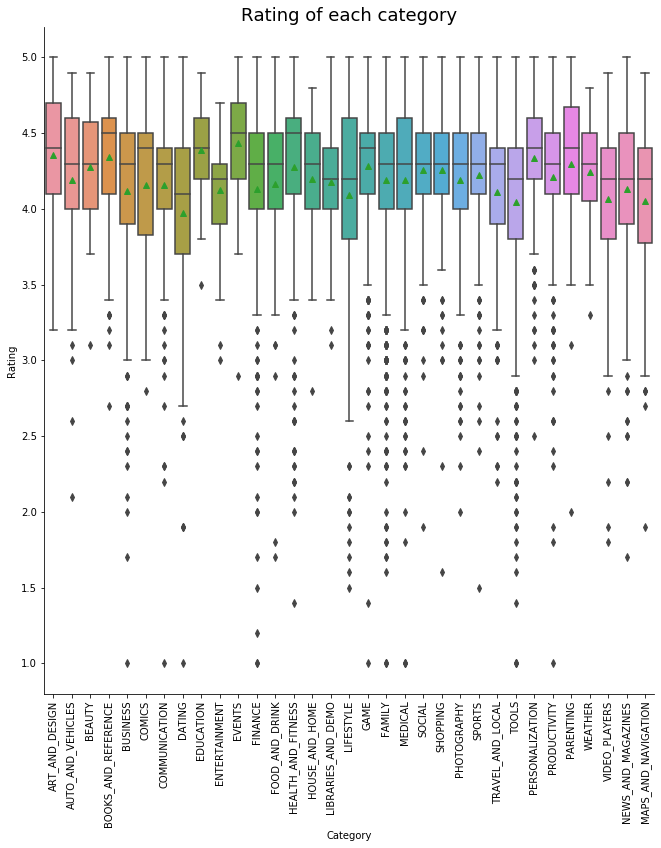

In [87]:
plt.figure(figsize=(50,20))
sns.catplot(x='Category',y='Rating',data=df,kind='box',height=10,showmeans=True)
plt.title("Rating of each category", size=18)
plt.xticks(rotation=90)

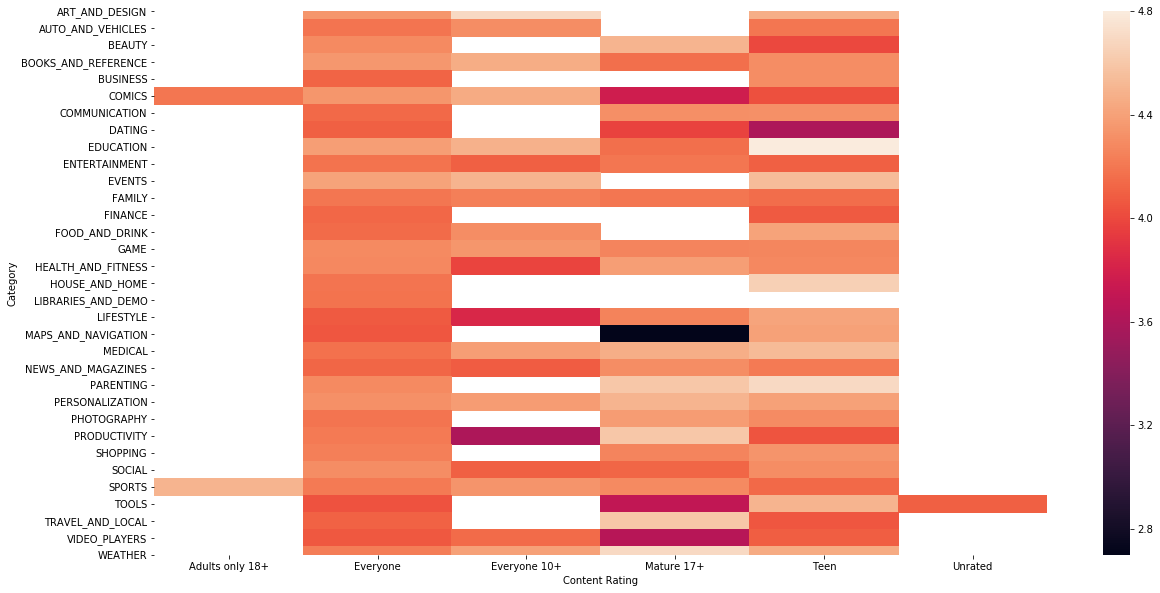

In [88]:
cat_con_rate = df.pivot_table(values='Rating',index='Category',columns='Content Rating')
plt.figure(figsize=(20,10))
sns.heatmap(cat_con_rate)

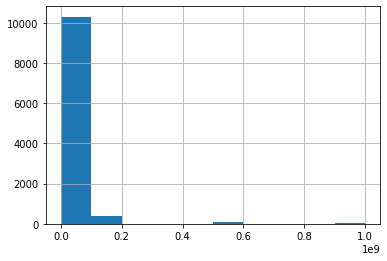

In [89]:
hist = df['Installs'].hist()

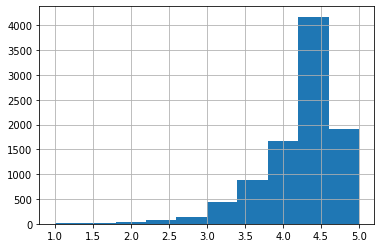

In [90]:
#It is clear that many of the ratings are closer to around 4.3 by the total distrbution. Perhaps the 4.5 and above should be the construct used to predict higher scores. 
hist2 = df['Rating'].hist()

**Discussion:**
    
It is important to note, that i'm unclear if the final can be any analysis or must be machine learning. Based off page 196, I will focus this case study on evaluating regression models. The dependant variables can change at any time in the modeling by class or changing the evaluation to 1/0 by a specific column classifiacation like scores higher than 4.5 have the Y attributes. 